In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [7]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

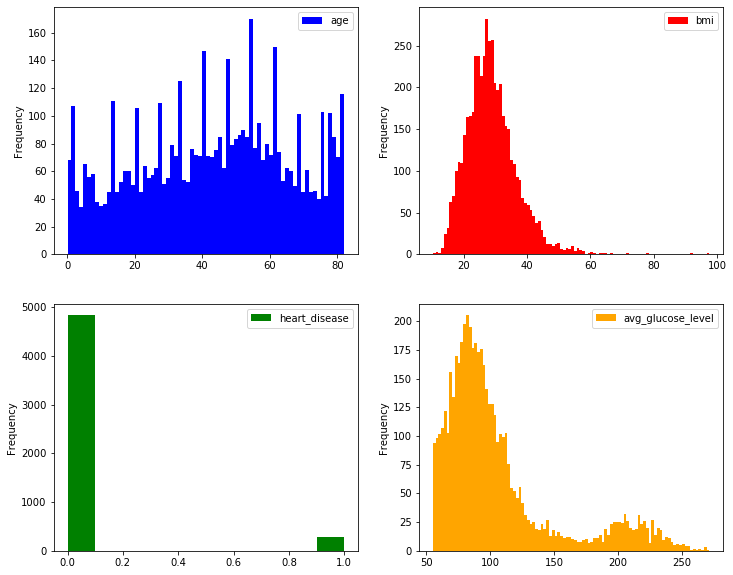

In [11]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,10))
data.plot(kind='hist',y='age',bins=70,color='b',ax=axes[0][0])
data.plot(kind='hist',y='bmi',bins=100,color='r',ax=axes[0][1])
data.plot(kind='hist',y='heart_disease',bins=10,color='g',ax=axes[1][0])
data.plot(kind='hist',y='avg_glucose_level',bins=100,color='orange',ax=axes[1][1])
plt.show()

we have good distribution for Age

In BMI there are outliers are present

In heart disease we have only 0 and 1 are present.
    0=dont have heart disease
    1=have heart disease


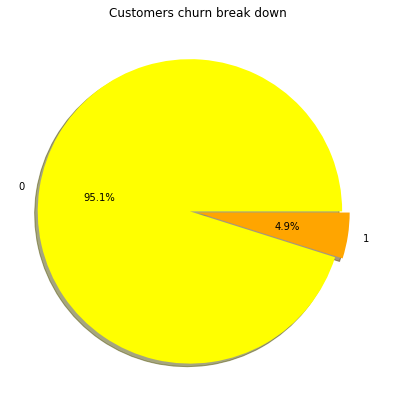

In [12]:
labels = data['stroke'].value_counts(sort=True).index
sizes = data['stroke'].value_counts(sort = True)

colors = ["yellow","orange"]
explode = (0.05,0)

plt.figure(figsize=(7,7))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%')

plt.title("Customers churn break down")
plt.show()

Only 5 % people have stroke

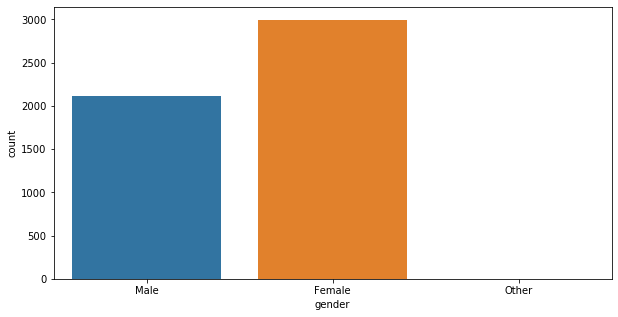

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='gender')
plt.show()

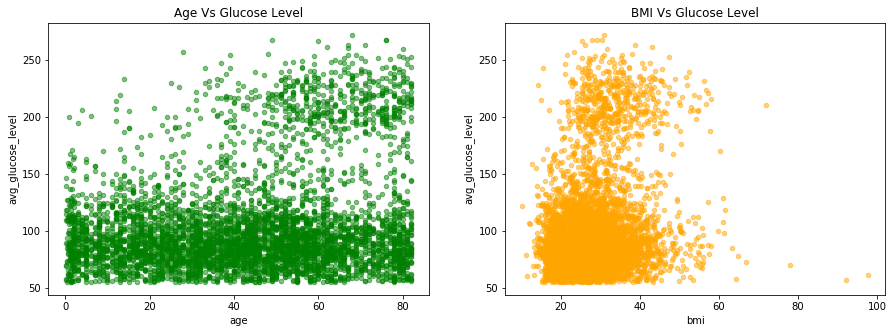

In [14]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
data.plot(kind='scatter',x='age',y='avg_glucose_level',color='green',ax=axes[0],alpha=0.5,title='Age Vs Glucose Level')
data.plot(kind='scatter',x='bmi',y='avg_glucose_level',color='orange',ax=axes[1],alpha=0.5,title='BMI Vs Glucose Level')
plt.show()

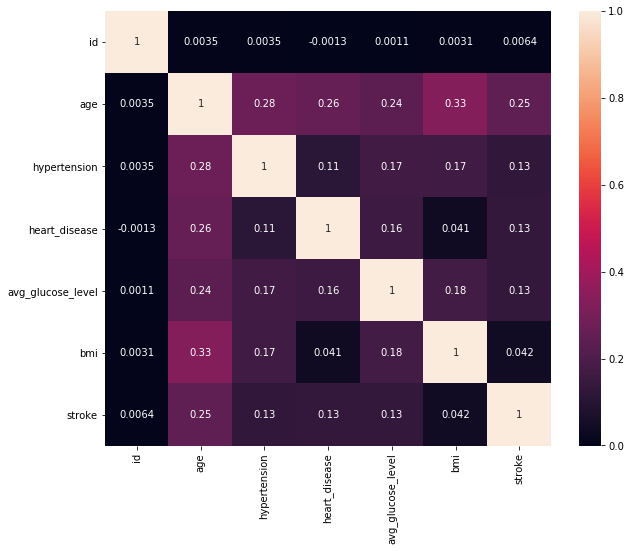

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

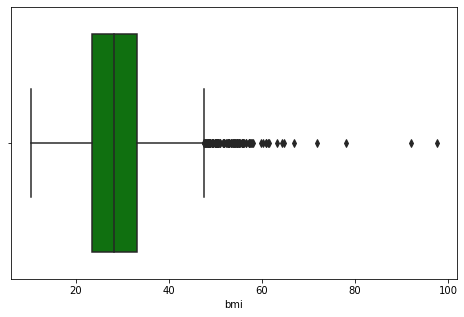

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data,x=data['bmi'],color="green")
plt.show()

In [17]:
#Remove those outlier whose obesity is greater than 50
bmi_outlier = data.loc[data['bmi']>50]
bmi_outlier.shape

(79, 12)

In [18]:
print(bmi_outlier['stroke'].value_counts())

0    78
1     1
Name: stroke, dtype: int64


In [19]:
data["bmi"].mean()

28.893236911794666

In [20]:
data["bmi"] = data["bmi"].apply(lambda x: 50 if x>50 else x)
data["bmi"] = data["bmi"].fillna(28.8)

In [21]:
print("Missing Values:",data.isnull().sum().values.sum())

Missing Values: 0


In [22]:
cat_df = data[['gender','Residence_type','smoking_status','stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary

stroke                             0    1
gender         Female           2853  141
               Male             2007  108
               Other               1    0
Residence_type Rural            2400  114
               Urban            2461  135
smoking_status Unknown          1497   47
               formerly smoked   815   70
               never smoked     1802   90
               smokes            747   42

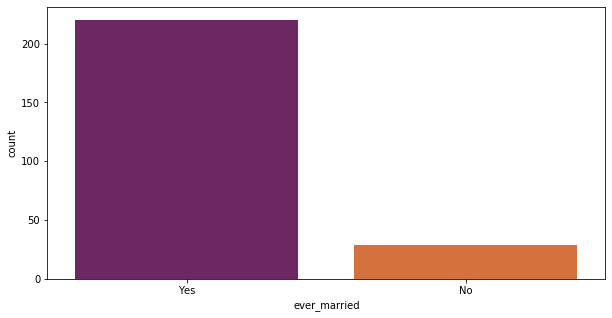

In [23]:
plt.figure(figsize=(10,5))
strok=data.loc[data['stroke']==1]
sns.countplot(data=strok,x='ever_married',palette='inferno');

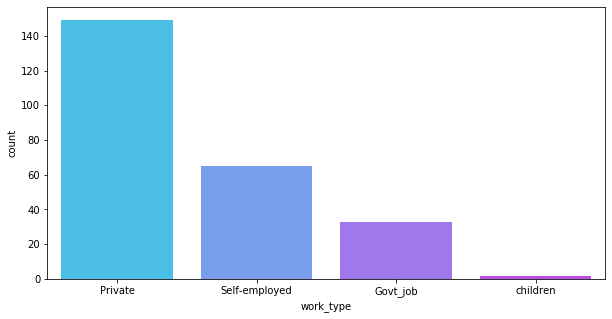

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='work_type',palette='cool')

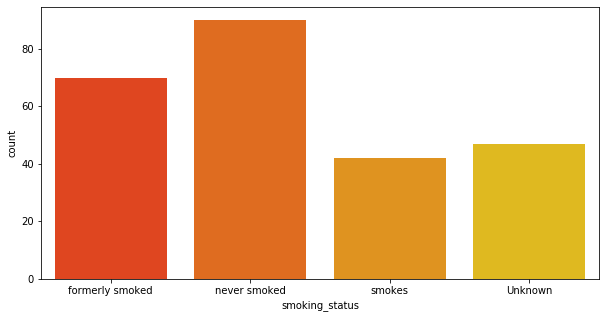

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='smoking_status',palette='autumn');

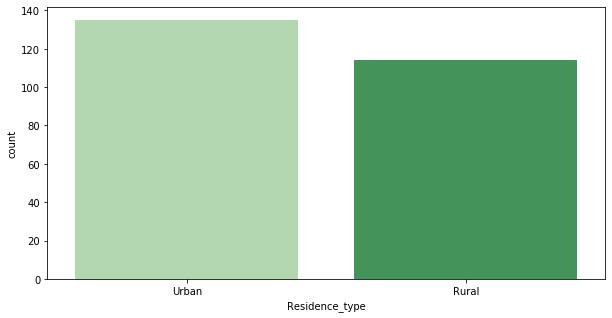

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='Residence_type',palette='Greens')
plt.show()

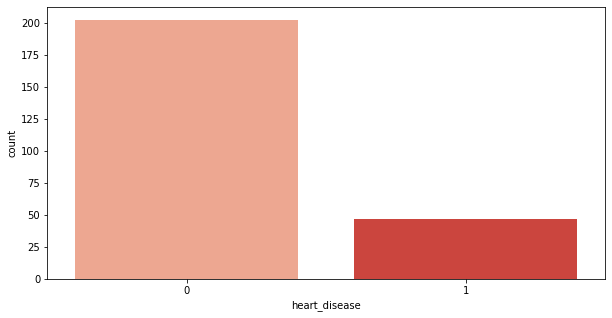

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='heart_disease',palette='Reds')
plt.show()

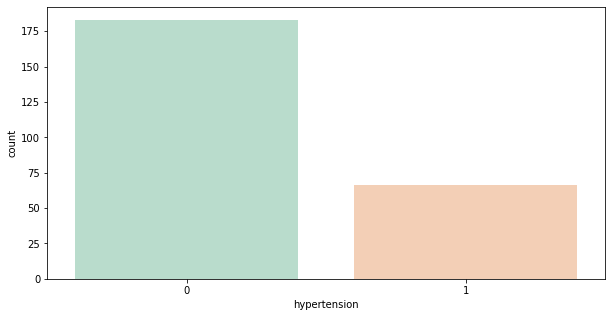

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='hypertension',palette='Pastel2')
plt.show()

In [29]:
data["Residence_type"] = data["Residence_type"].apply(lambda x:1 if x == "Urban" else 0)
data["ever_married"] = data["ever_married"].apply(lambda x:1 if x == "Yes" else 0)
data["gender"] = data["gender"].apply(lambda x:1 if x=="Male" else 0 )

In [30]:
smoke = {'never smoked':0,'formerly smoked':1,'Unknown':2,'smokes':3}

In [31]:
data['smoking_status'] = data['smoking_status'].map(smoke)

In [32]:
data['smoking_status'].value_counts()

0    1892
2    1544
1     885
3     789
Name: smoking_status, dtype: int64

In [33]:
work = {"Private":0,"Self-employed":1,"Govt_job":2,"children":3,"Never_worked":4}

In [34]:
data["work_type"] = data["work_type"].map(work)

In [35]:
data["work_type"].value_counts()

0    2925
1     819
3     687
2     657
4      22
Name: work_type, dtype: int64

In [36]:
data.shape

(5110, 12)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()

In [39]:
columns = ['avg_glucose_level','bmi','age']
data[columns] = sc.fit_transform(data[['avg_glucose_level','bmi','age']])



In [40]:
data=data.drop(columns='id',axis=1)

In [41]:
data[data.isnull().any(axis=1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [42]:
X = data.drop(['stroke'], axis=1).values 
y = data['stroke'].values

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [47]:
ab_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                            learning_rate=0.5, random_state=100)

#training via adaboost classficiation model
ab_clf.fit(X_train, y_train)
print("training....\n")

#make prediction using the test set
ab_pred_stroke= ab_clf.predict(X_train)
print('prediction: \n', ab_pred_stroke)

print('\nparms: \n', ab_clf.get_params)

#score
ab_clf_score = ab_clf.score(X_test, y_test)
print("\nmean accuracy: %.2f" % ab_clf.score(X_test, y_test))


training....

prediction: 
 [0 0 0 ... 0 0 0]

parms: 
 <bound method BaseEstimator.get_params of AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
    

Training Score 0.9586245457086945
Testing Score 
 0.9510763209393346
0.9510763209393346


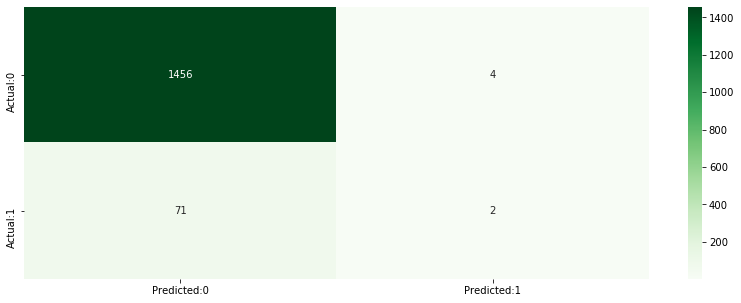

In [48]:
xgboost = GradientBoostingClassifier(random_state=0)
xgboost.fit(X_train, y_train)

xgboost_score = xgboost.score(X_train, y_train)
xgboost_test = xgboost.score(X_test, y_test)

#testing model 
 
y_pred = xgboost.predict(X_test)

#evaluation

cm = confusion_matrix(y_test,y_pred)
print('Training Score',xgboost_score)
print('Testing Score \n',xgboost_test)


#Confusion Matrix 
plt.figure(figsize=(14,5))

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens");
print(accuracy_score(y_test,y_pred))

In [49]:
svc = SVC(random_state=0)
svc.fit(X_train, y_train)
#== 
#Score 
#== 
svc_score = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = svc.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',svc_score)
print('Testing Score \n',svc_test)
print(cm)

Training Score 0.950796757058988
Testing Score 
 0.9523809523809523
[[1460    0]
 [  73    0]]


In [50]:
forest = RandomForestClassifier(n_estimators = 100)
#== 
forest.fit(X_train, y_train)
#== 
#Score 
#== 
forest_score = forest.score(X_train, y_train)
forest_test = forest.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = forest.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)
print(cm)

Training Score 1.0
Testing Score 
 0.9484670580560991
[[1454    6]
 [  73    0]]


In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print('Testing Score \n',score)
logistic_score = model.score(X_train, y_train)
logistic_test = model.score(X_test, y_test)
#== 
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))
#== 
cm = confusion_matrix(y_test,y_pred)
print(cm)

Testing Score 
 0.9523809523809523
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1460
           1       0.00      0.00      0.00        73

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533

[[1460    0]
 [  73    0]]


C:\Users\user\Anaconda3\envs\AllPackages\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
X = data.drop(['stroke','gender','bmi','Residence_type'], axis=1).values 
y = data['stroke'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [56]:
mlp=MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=1000, alpha=0.00001,
                     solver='adam', verbose=10,  random_state=21)
mlp.fit(X_train, y_train)
mlp_pred= mlp.predict(X_test)

mlp_score = mlp.score(X_train, y_train)
mlp_test = mlp.score(X_test, y_test)


y_pred =mlp.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',mlp_score)
print('Testing Score \n',mlp_test)
print(cm)

Iteration 1, loss = 0.30024469
Iteration 2, loss = 0.17019373
Iteration 3, loss = 0.16083014
Iteration 4, loss = 0.15841371
Iteration 5, loss = 0.15846590
Iteration 6, loss = 0.15700385
Iteration 7, loss = 0.15491355
Iteration 8, loss = 0.15390657
Iteration 9, loss = 0.15318004
Iteration 10, loss = 0.15209214
Iteration 11, loss = 0.15105984
Iteration 12, loss = 0.15025733
Iteration 13, loss = 0.15069247
Iteration 14, loss = 0.15075719
Iteration 15, loss = 0.14886837
Iteration 16, loss = 0.15118678
Iteration 17, loss = 0.14857644
Iteration 18, loss = 0.14591295
Iteration 19, loss = 0.14436507
Iteration 20, loss = 0.14430438
Iteration 21, loss = 0.14533723
Iteration 22, loss = 0.14747142
Iteration 23, loss = 0.14723311
Iteration 24, loss = 0.14256941
Iteration 25, loss = 0.14248491
Iteration 26, loss = 0.14348745
Iteration 27, loss = 0.14250296
Iteration 28, loss = 0.14254617
Iteration 29, loss = 0.13821595
Iteration 30, loss = 0.13833515
Iteration 31, loss = 0.13923054
Iteration 32, los

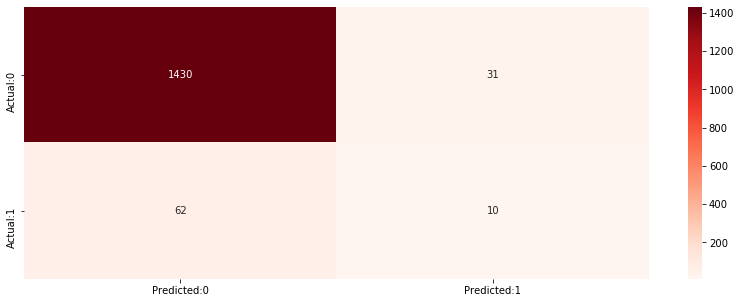

In [59]:
plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds")
plt.show()

In [61]:
import pickle

In [92]:
# Saving model to disk
pickle.dump(ab_clf, open('adaboost.pkl','wb'))

In [93]:
model = pickle.load(open('adaboost.pkl','rb'))

In [94]:
print(model.predict([[0.2,1,1,1,1,3,1,2,1,1]]))

[0]


In [95]:
model.predict([[1.000000,1.051434,0.000000,1.000000,1.000000,0.000000,1.000000,2.706375,1.067251,1.000000]])

array([1], dtype=int64)

In [96]:
data.iloc[0]

gender               1.000000
age                  1.051434
hypertension         0.000000
heart_disease        1.000000
ever_married         1.000000
work_type            0.000000
Residence_type       1.000000
avg_glucose_level    2.706375
bmi                  1.067251
smoking_status       1.000000
stroke               1.000000
Name: 0, dtype: float64